<p>REMY Jean-Baptiste</p>
<p>BEAUDET Robin</p>


# <center> Prediction de crimes - Stat des - Philadelphia</center>



In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [3]:
pd.set_option('max_rows',200)
pd.set_option('max_columns',100)

In [4]:
df = pd.read_csv('E:\\ENSAE\\python\\Projet ML\\Philadelphia\\Time_serie.csv', index_col=0)

In [5]:
df = df.drop([130,131],axis=0)
df.head()

,Other Assaults,All Other Offenses,Assault,Theft,Burglary,Order,Arson,Fraud,Robbery,Vagrancy/Loitering,Rape,Other Sex Offenses (Not Commercialized),Homicide,Crimes,Mining_Logging_Construction,Manufacturing,Trade_Transportation_Utilities,Information,Financial_Activities,Professional_and_Business_Services,Education_and_Health_Services,Leisure_and_Hospitality,Other_Services,Government,Labor Force,Employment,Unemployment,Unemployment Rate
0,2173,4295,2895,3696,908,2204,44,1924,890,55,96,154,25,19359,11800,30400,88400,12700,47700,82600,182800,54500,28100,113900,608659,568770,39889,6.6
1,1853,3430,2395,2999,674,1966,40,1607,659,46,61,142,22,15894,12000,30400,87400,13300,47600,83100,191000,55000,28100,115100,609180,570129,39051,6.4
2,2459,3706,3025,3551,842,2225,51,1698,776,51,78,131,34,18627,12100,30400,87800,12600,47400,83000,188000,55900,28300,115200,609354,571811,37543,6.2
3,2343,4422,2904,3447,781,2184,55,1672,816,43,92,143,38,18940,12300,30400,87900,12700,47500,83600,190900,58100,28400,116300,610997,575352,35645,5.8
4,2500,3734,3389,4138,1001,2091,68,1892,907,38,87,165,31,20041,13500,30300,88400,12900,47600,83500,187600,59000,28500,115600,613592,575646,37946,6.2


In [6]:
df.shape

(130, 28)

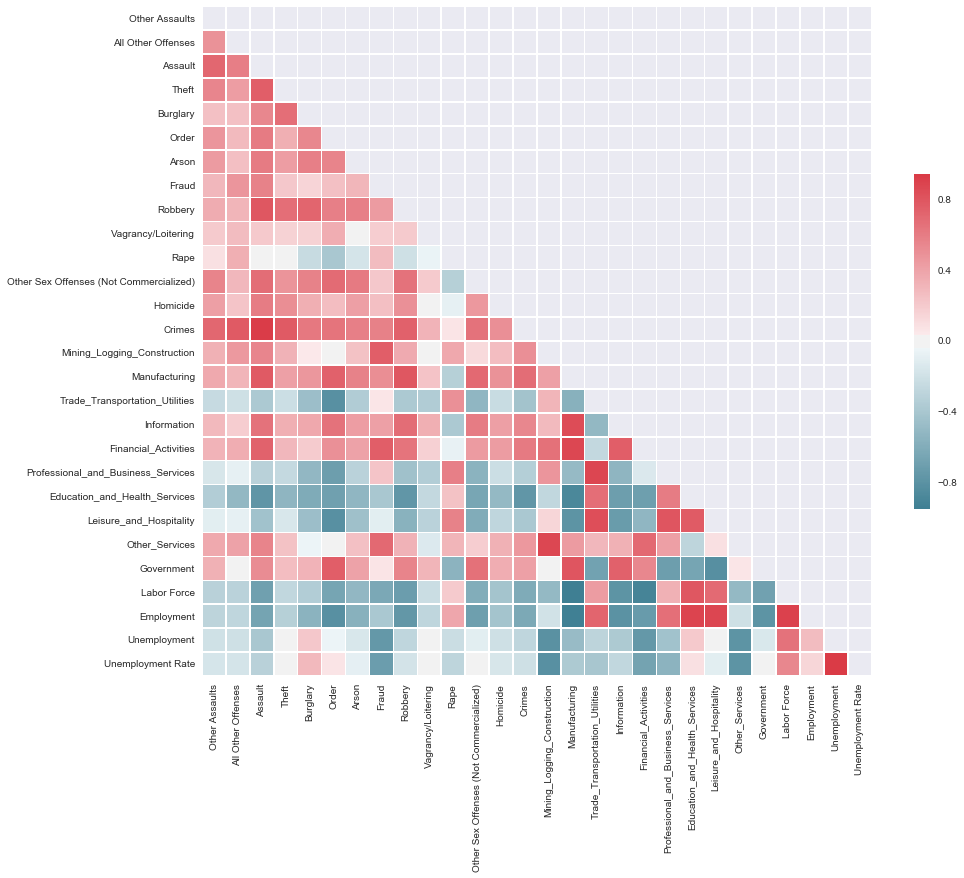

In [7]:
import seaborn as sns

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

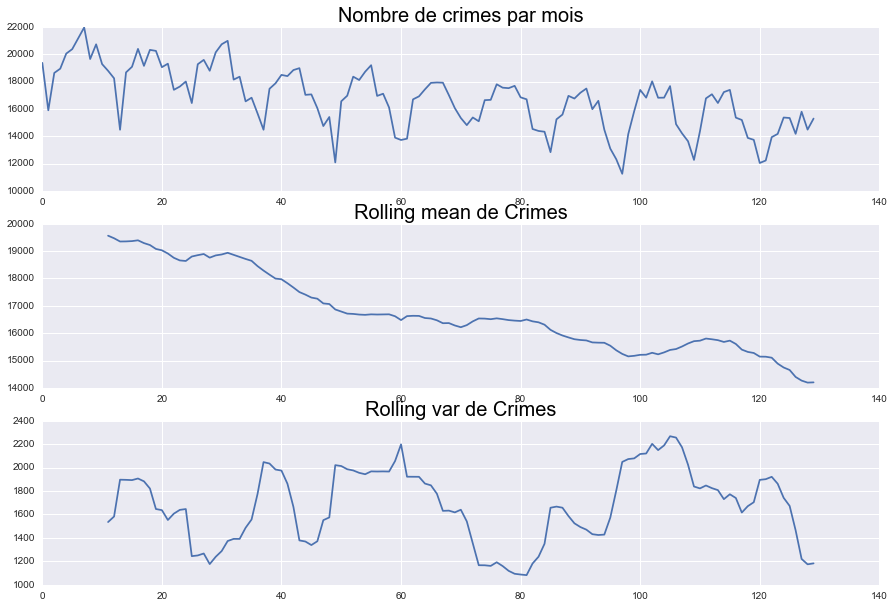

In [8]:
fig,ax = plt.subplots(3,1,figsize=(15,10))
ax[0].plot(df.Crimes)
ax[0].set_title('Nombre de crimes par mois', color = 'k', fontsize = 20)
ax[1].plot(df.Crimes.rolling(center=False,window=12).mean())
ax[1].set_title('Rolling mean de Crimes', color = 'k', fontsize = 20)
ax[2].plot(df.Crimes.rolling(center=False,window=12).std())
ax[2].set_title('Rolling var de Crimes', color = 'k', fontsize = 20)

On va tenter de rendre la série stationnaire en la differenciant

In [9]:
df['Crimes_Diff_1'] = df.Crimes.diff(periods=1)

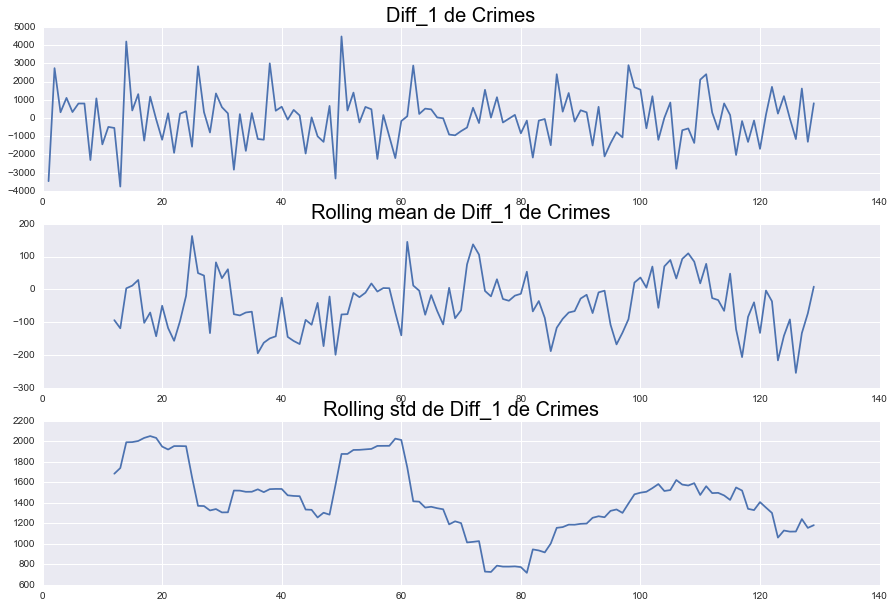

In [10]:
fig,ax = plt.subplots(3,1,figsize=(15,10))
ax[0].plot(df.Crimes_Diff_1)
ax[0].set_title('Diff_1 de Crimes', color = 'k', fontsize = 20)
ax[1].plot(df.Crimes_Diff_1.rolling(center=False,window=12).mean())
ax[1].set_title('Rolling mean de Diff_1 de Crimes', color = 'k', fontsize = 20)
ax[2].plot(df.Crimes_Diff_1.rolling(center=False,window=12).std())
ax[2].set_title('Rolling std de Diff_1 de Crimes', color = 'k', fontsize = 20)

Cette série semble relativement stationnaire

Regardons sa fonction d'autocorrelation

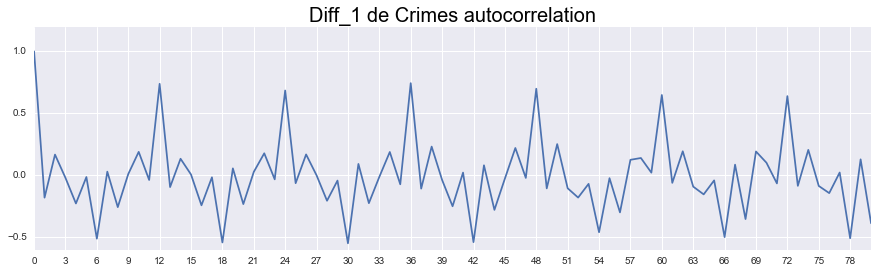

In [11]:
from pandas.tools.plotting import autocorrelation_plot

plt.figure(figsize=(15,4))
plt.plot([df.Crimes_Diff_1.autocorr(lag=i) for i in range(0,81)])
plt.xticks(np.arange(0,80,3))
plt.title('Diff_1 de Crimes autocorrelation', color = 'k', fontsize = 20)

Regression linéaire de la rolling mean de Diff_1 de Crimes

In [12]:
from sklearn.linear_model import LinearRegression

LineReg = LinearRegression(fit_intercept=True)
X = np.array([i for i in range(12,130)]).reshape(118,1)
Y = np.array(df.Crimes_Diff_1.rolling(center=False,window=12).mean()[12:130])
Y = Y.reshape((118,1))
LineReg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

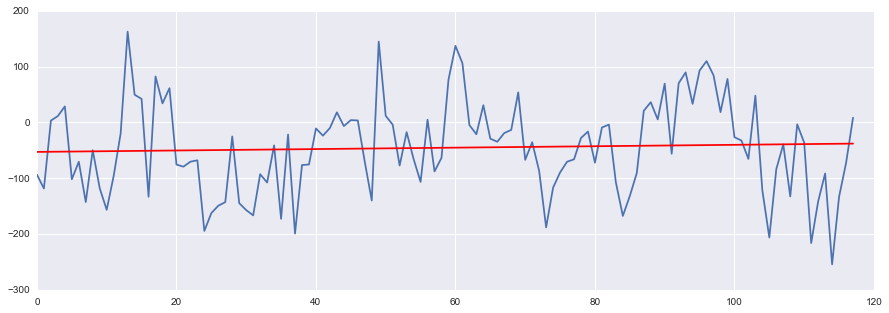

In [13]:
fig = plt.figure(figsize=(15,5))
plt.plot(Y)
plt.plot(LineReg.predict(X),color = 'r')

On Observe que la tendance est plutot a la hausse, legèrement.

In [14]:
df['Crimes_Rolling_Mean_Diff_1'] = df.Crimes_Diff_1.rolling(center=False,window=12).mean().diff(periods=1)

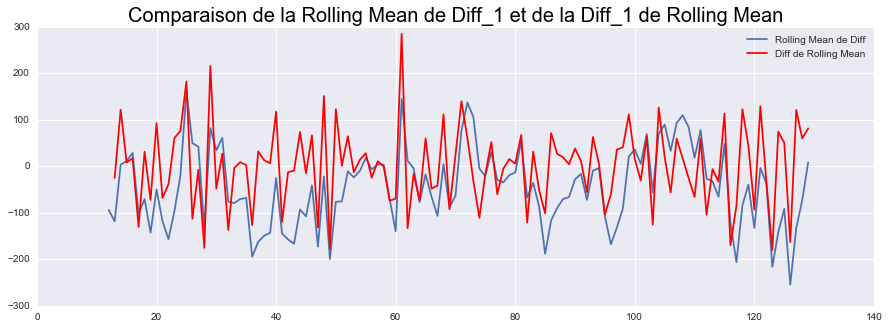

In [15]:
fig = plt.figure(figsize=(15,5))
plt.plot(df.Crimes_Diff_1.rolling(center=False,window=12).mean(), label = 'Rolling Mean de Diff')
plt.plot(df['Crimes_Rolling_Mean_Diff_1'],color = 'r', label = 'Diff de Rolling Mean')
plt.legend(loc='best')
plt.title('Comparaison de la Rolling Mean de Diff_1 et de la Diff_1 de Rolling Mean', color = 'k', fontsize = 20)

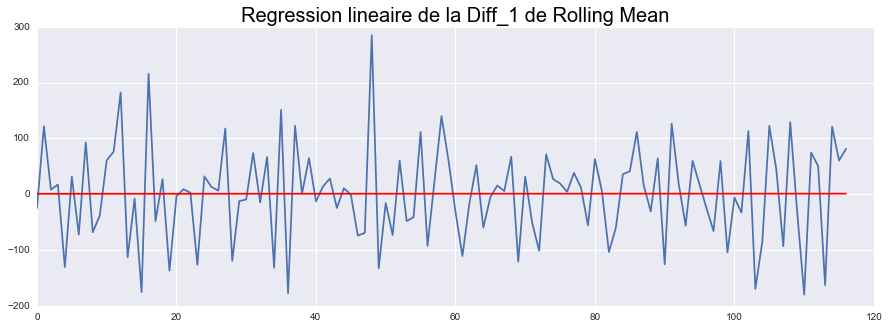

In [16]:
LineReg = LinearRegression(fit_intercept=True)
X = np.array([i for i in range(13,130)]).reshape(117,1)
Y = np.array(df['Crimes_Rolling_Mean_Diff_1'].ix[13:130])
Y = Y.reshape((117,1))
LineReg.fit(X,Y)
fig = plt.figure(figsize=(15,5))
plt.plot(Y)
plt.plot(LineReg.predict(X),color = 'r')
plt.title('Regression lineaire de la Diff_1 de Rolling Mean', color = 'k', fontsize = 20)

Decompostion de la differciée

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

E:\Anaconda\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


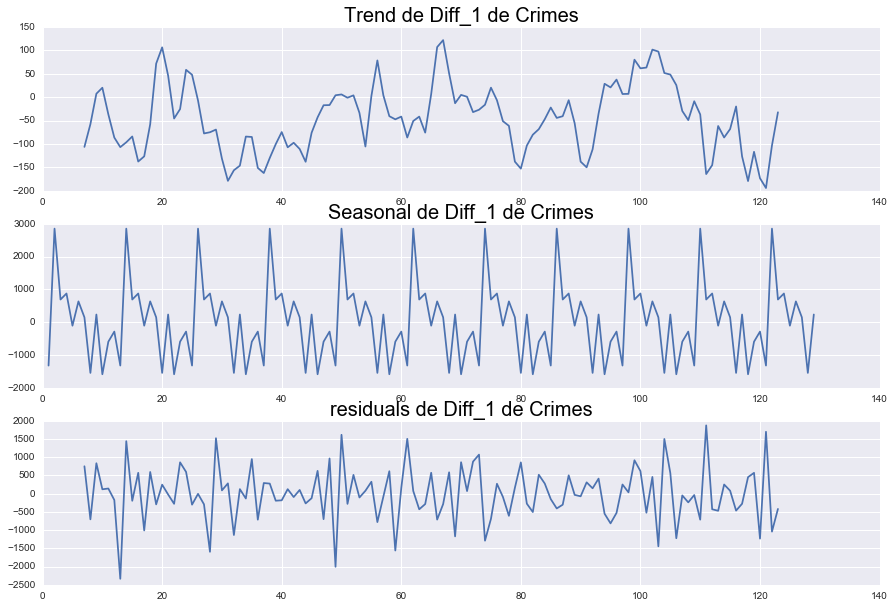

In [18]:
decomposition = seasonal_decompose(np.array(df.Crimes_Diff_1[df.Crimes_Diff_1.isnull()==False]),freq=12)

df['trend'] =  np.concatenate((np.array([float('nan')]),decomposition.trend),axis=0)
df['seasonal'] =  np.concatenate((np.array([float('nan')]),decomposition.seasonal),axis=0)
df['residuals'] =  np.concatenate((np.array([float('nan')]),decomposition.resid),axis=0)

fig,ax = plt.subplots(3,1,figsize=(15,10))
ax[0].plot(df.trend)
ax[0].set_title('Trend de Diff_1 de Crimes', color = 'k', fontsize = 20)
ax[1].plot(df.seasonal)
ax[1].set_title('Seasonal de Diff_1 de Crimes', color = 'k', fontsize = 20)
ax[2].plot(df.residuals)
ax[2].set_title('residuals de Diff_1 de Crimes', color = 'k', fontsize = 20)

### Regardons à quoi ressemble les autres crimes

In [19]:
df.columns

Index(['Other Assaults', 'All Other Offenses', 'Assault', 'Theft', 'Burglary',
       'Order', 'Arson', 'Fraud', 'Robbery', 'Vagrancy/Loitering', 'Rape',
       'Other Sex Offenses (Not Commercialized)', 'Homicide', 'Crimes',
       'Mining_Logging_Construction', 'Manufacturing',
       'Trade_Transportation_Utilities', 'Information', 'Financial_Activities',
       'Professional_and_Business_Services', 'Education_and_Health_Services',
       'Leisure_and_Hospitality', 'Other_Services', 'Government',
       'Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate',
       'Crimes_Diff_1', 'Crimes_Rolling_Mean_Diff_1', 'trend', 'seasonal',
       'residuals'],
      dtype='object')

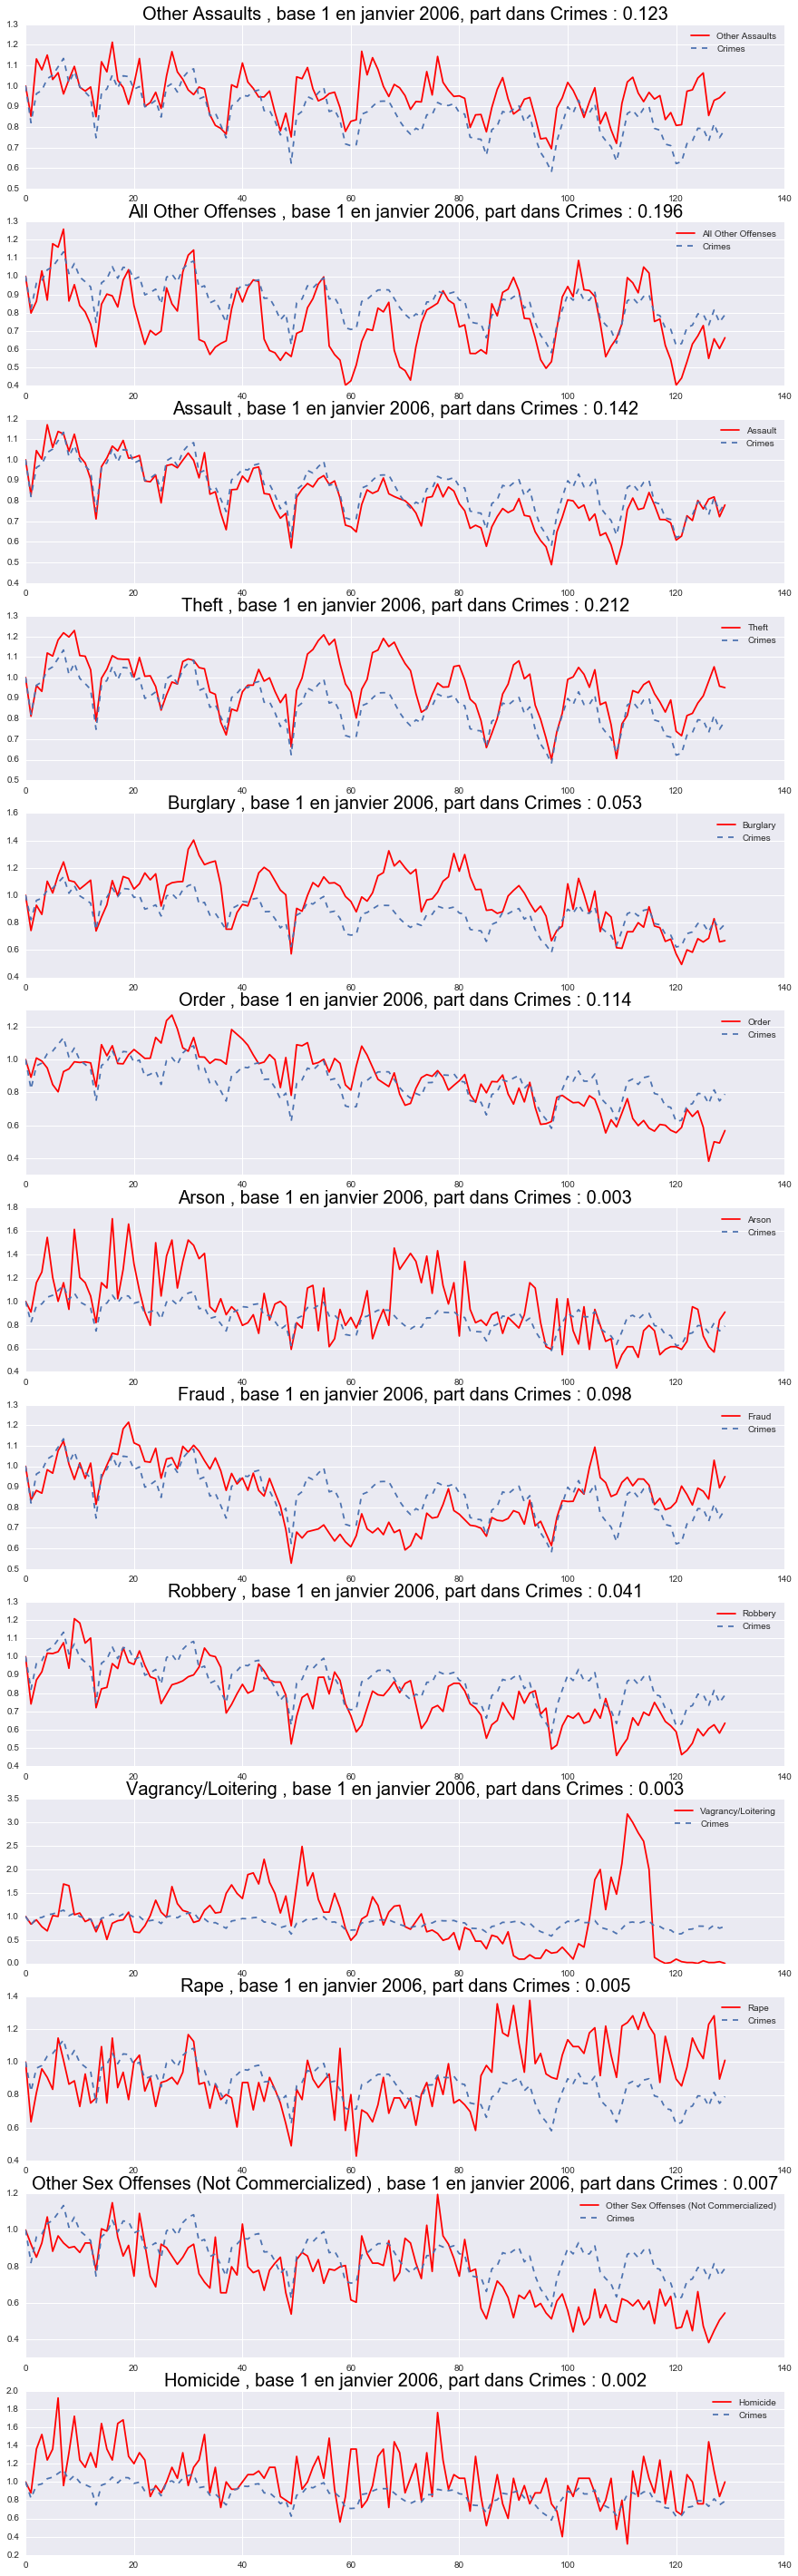

In [20]:
fig,ax = plt.subplots(13,1,figsize=(15,50))
for j,i in enumerate(['Other Assaults', 'All Other Offenses', 'Assault', 'Theft', 'Burglary',
       'Order', 'Arson', 'Fraud', 'Robbery', 'Vagrancy/Loitering', 'Rape',
       'Other Sex Offenses (Not Commercialized)', 'Homicide']):
    ax[j].plot(df[i]/df[i].ix[0],color = 'r', label = i)
    ax[j].plot(df['Crimes']/df['Crimes'].ix[0], linestyle = '--', label = 'Crimes')
    ax[j].set_title(i+' , base 1 en janvier 2006, part dans Crimes : %.3f' % (df[i].sum()/df.Crimes.sum())
                    ,color = 'k', fontsize = 20)
    ax[j].legend(loc='best')

On va sortir un certain nombre de type de crime de la prévision, parcequ'ils sont moins interressants a prédire et surtout trop aléatoires ou décorellée du comportement des autres crimes: 
<ul><li><b>Arson</b></li>
    <li><b>Fraud</b></li>
    <li><b>Vagrancy/Loitering</b></li>
    <li><b>Rape</b></li>
    <li><b>Other Sex Offenses (Not Commercialized)</b></li>
</ul>

In [21]:
df['Crimes_2'] = df.Crimes - df.Arson - df.Fraud - df['Vagrancy/Loitering'] - df.Rape - df['Other Sex Offenses (Not Commercialized)']
df['Crimes_2_Diff_1'] = df.Crimes_2.diff(periods=1)

Effectuons la décomposition sur Crimes_2

E:\Anaconda\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


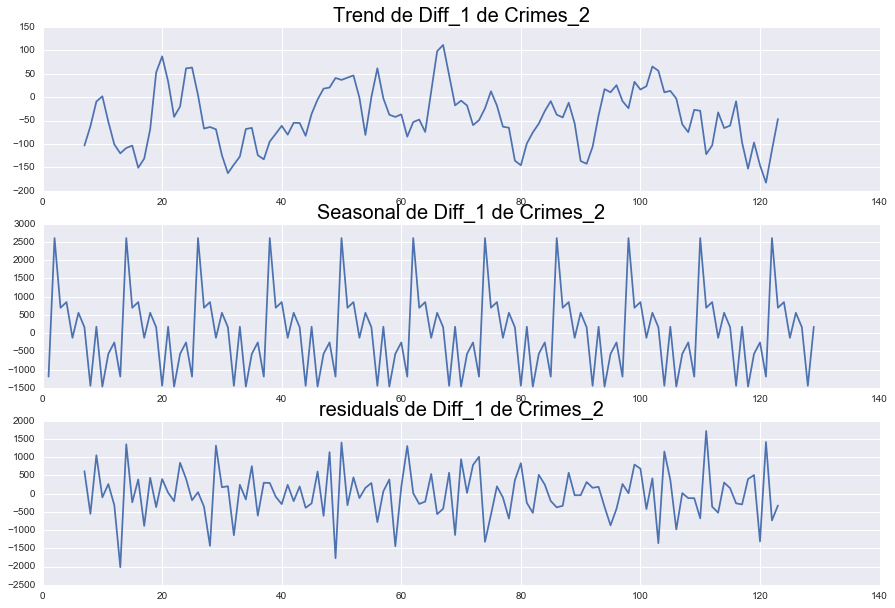

In [22]:
decomposition = seasonal_decompose(np.array(df.Crimes_2_Diff_1[df.Crimes_2_Diff_1.isnull()==False]),freq=12)

df['trend_2'] =  np.concatenate((np.array([float('nan')]),decomposition.trend),axis=0)
df['seasonal_2'] =  np.concatenate((np.array([float('nan')]),decomposition.seasonal),axis=0)
df['residuals_2'] =  np.concatenate((np.array([float('nan')]),decomposition.resid),axis=0)

fig,ax = plt.subplots(3,1,figsize=(15,10))
ax[0].plot(df.trend_2)
ax[0].set_title('Trend de Diff_1 de Crimes_2', color = 'k', fontsize = 20)
ax[1].plot(df.seasonal_2)
ax[1].set_title('Seasonal de Diff_1 de Crimes_2', color = 'k', fontsize = 20)
ax[2].plot(df.residuals_2)
ax[2].set_title('residuals de Diff_1 de Crimes_2', color = 'k', fontsize = 20)

Comparrons les deux résidus

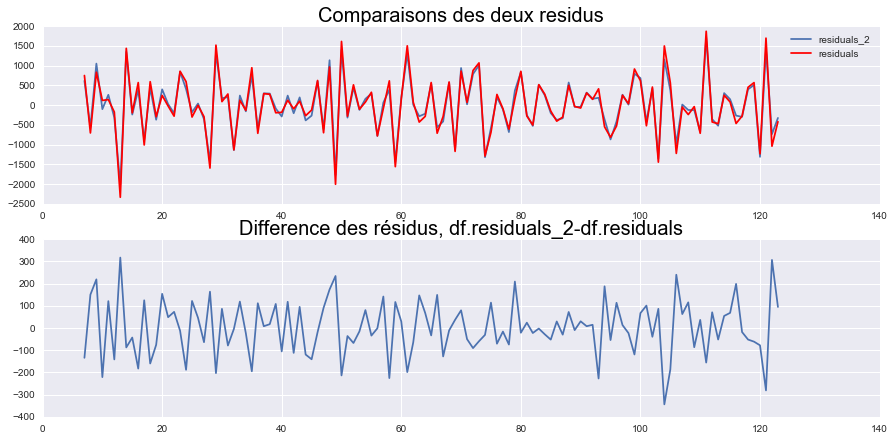

In [23]:
fig,ax = plt.subplots(2,1,figsize=(15,7))
ax[0].plot(df.residuals_2, label = 'residuals_2')
ax[0].plot(df.residuals,color='r',label = 'residuals')
ax[0].set_title('Comparaisons des deux residus', color = 'k', fontsize = 20)
ax[0].legend(loc='best')
ax[1].plot(df.residuals_2-df.residuals)
ax[1].set_title('Difference des résidus, df.residuals_2-df.residuals', color = 'k', fontsize = 20)

### Les variables socio-demographiques

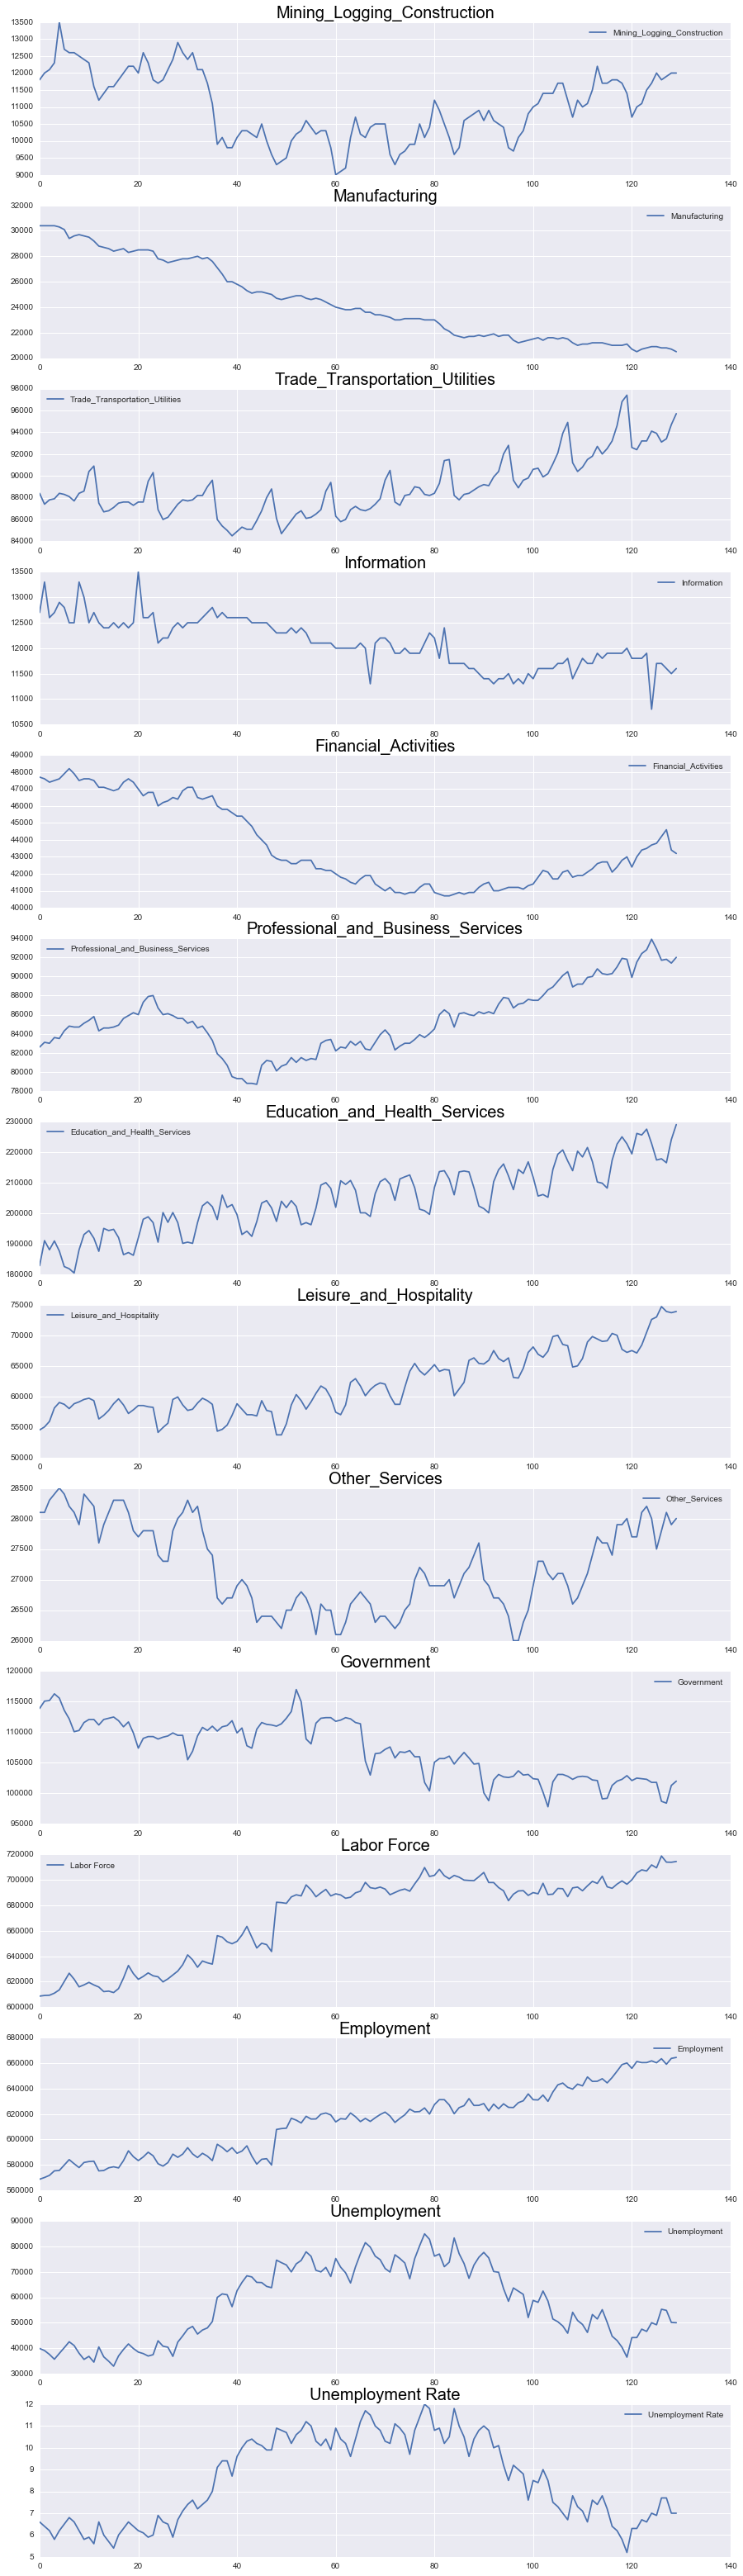

In [24]:
fig,ax = plt.subplots(14,1,figsize=(15,55))
for j,i in enumerate(['Mining_Logging_Construction', 'Manufacturing',
       'Trade_Transportation_Utilities', 'Information', 'Financial_Activities',
       'Professional_and_Business_Services', 'Education_and_Health_Services',
       'Leisure_and_Hospitality', 'Other_Services', 'Government',
       'Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate']):
    ax[j].plot(df[i], label = i)
    ax[j].set_title(i, color = 'k', fontsize = 20)
    ax[j].legend(loc='best')

Differentions Unemployement Rate

In [25]:
df['Unemployment_Rate_Diff_1'] = df['Unemployment Rate'].diff(periods=1)
df['Unemployment_Rate_Mean_Diff_1'] = df['Unemployment_Rate_Diff_1'].rolling(center=False,window=12).mean()

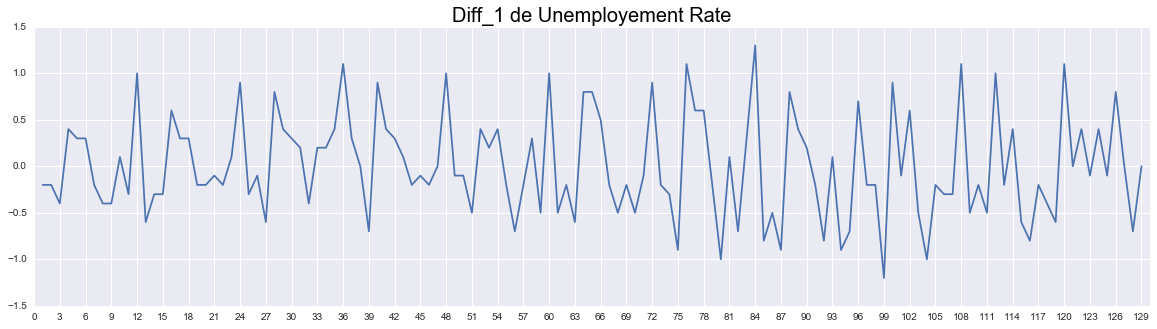

In [26]:
plt.figure(figsize=(20,5))
plt.plot(df.Unemployment_Rate_Diff_1)
plt.xticks(np.arange(0,130,3))
plt.xlim((0,130))
plt.title('Diff_1 de Unemployement Rate', color = 'k', fontsize = 20)

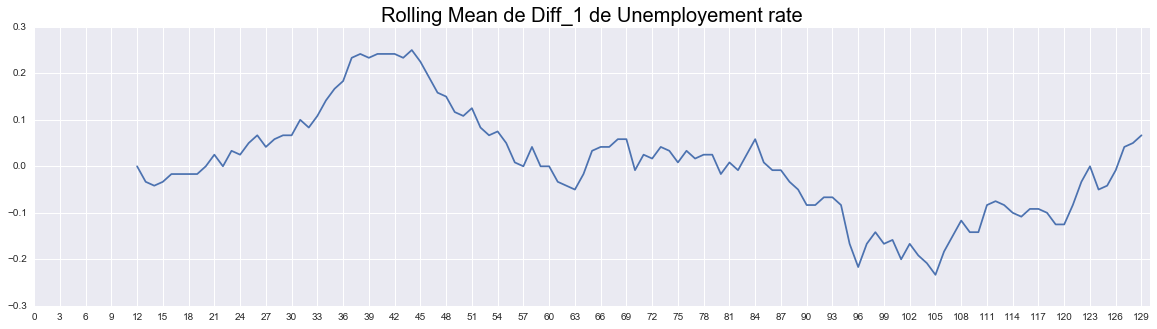

In [27]:
plt.figure(figsize=(20,5))
plt.plot(df.Unemployment_Rate_Mean_Diff_1)
plt.xticks(np.arange(0,130,3))
plt.xlim((0,130))
plt.title('Rolling Mean de Diff_1 de Unemployement rate', color = 'k', fontsize = 20)

### Correlation avec certaines nouvelles variables

In [28]:
df.columns

Index(['Other Assaults', 'All Other Offenses', 'Assault', 'Theft', 'Burglary',
       'Order', 'Arson', 'Fraud', 'Robbery', 'Vagrancy/Loitering', 'Rape',
       'Other Sex Offenses (Not Commercialized)', 'Homicide', 'Crimes',
       'Mining_Logging_Construction', 'Manufacturing',
       'Trade_Transportation_Utilities', 'Information', 'Financial_Activities',
       'Professional_and_Business_Services', 'Education_and_Health_Services',
       'Leisure_and_Hospitality', 'Other_Services', 'Government',
       'Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate',
       'Crimes_Diff_1', 'Crimes_Rolling_Mean_Diff_1', 'trend', 'seasonal',
       'residuals', 'Crimes_2', 'Crimes_2_Diff_1', 'trend_2', 'seasonal_2',
       'residuals_2', 'Unemployment_Rate_Diff_1',
       'Unemployment_Rate_Mean_Diff_1'],
      dtype='object')

In [29]:
df['Crimes_Diff_1_std'] = df.Crimes_Diff_1.rolling(center=False,window=12).std()
df['Crimes_Diff_1_Mean'] = df.Crimes_Diff_1.rolling(center=False,window=12).mean()
df['Other Assaults_Diff_1'] = df['Other Assaults'].diff(periods = 1)
df['All Other Offenses_Diff_1'] = df['Other Assaults'].diff(periods = 1)
df['Assault_Diff_1'] = df['Other Assaults'].diff(periods = 1)

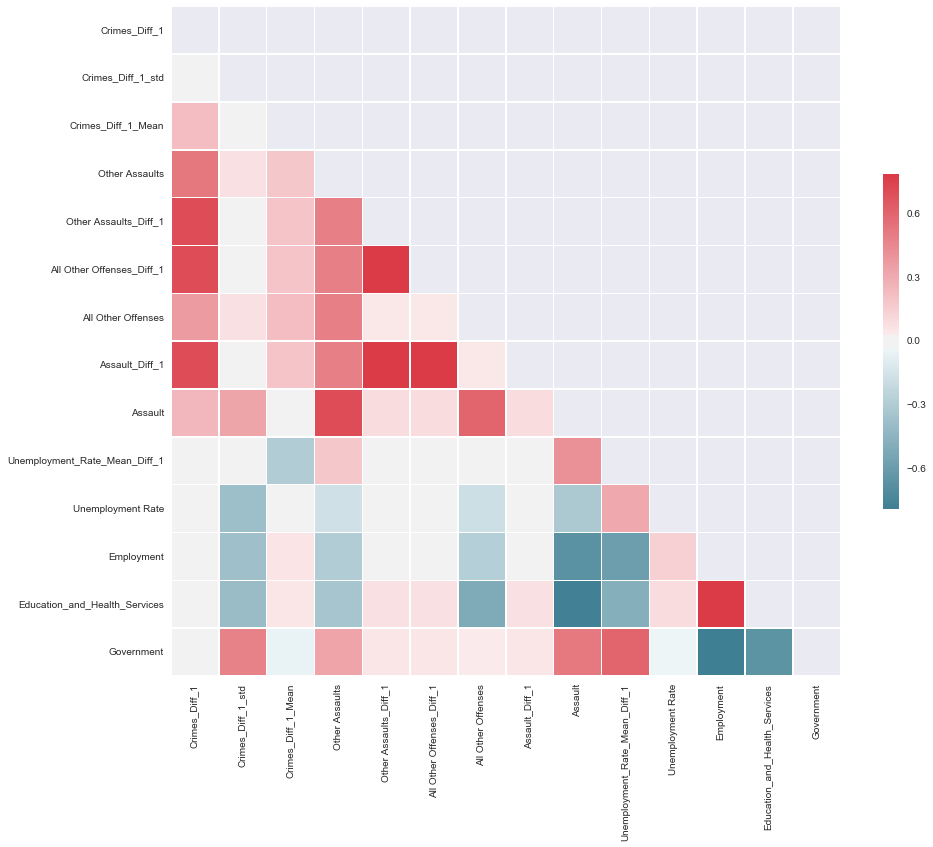

In [30]:
import seaborn as sns

corr = df[['Crimes_Diff_1','Crimes_Diff_1_std','Crimes_Diff_1_Mean','Other Assaults','Other Assaults_Diff_1',
           'All Other Offenses_Diff_1','All Other Offenses','Assault_Diff_1','Assault',
           'Unemployment_Rate_Mean_Diff_1','Unemployment Rate',
          'Employment','Education_and_Health_Services','Government']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Variables laggées

In [31]:
df['Crimes_2_Diff_2'] = df.Crimes_2_Diff_1.diff(periods=1)

In [36]:
for i in range(1,13):
    df['Crimes_2_lagged_'+str(i)] = df.Crimes_2.shift(periods=i)
for i in range(1,13):
    df['Crimes_2_Diff_1_lagged_'+str(i)] = df.Crimes_2_Diff_1.shift(periods=i)
df['Crimes_2_Diff_2_lagged_1'] = df.Crimes_2_Diff_1.diff(periods=1)
for i in range(5,15):
    df['Unemployement_rate_lagged_'+str(i)] = df['Unemployment Rate'].shift(periods=i)
for i in range(5,15):
    df['Unemployement_rate_Diff_1_lagged_'+str(i)] = df['Unemployment_Rate_Diff_1'].shift(periods=i)

In [37]:
df.columns

Index(['Other Assaults', 'All Other Offenses', 'Assault', 'Theft', 'Burglary',
       'Order', 'Arson', 'Fraud', 'Robbery', 'Vagrancy/Loitering', 'Rape',
       'Other Sex Offenses (Not Commercialized)', 'Homicide', 'Crimes',
       'Mining_Logging_Construction', 'Manufacturing',
       'Trade_Transportation_Utilities', 'Information', 'Financial_Activities',
       'Professional_and_Business_Services', 'Education_and_Health_Services',
       'Leisure_and_Hospitality', 'Other_Services', 'Government',
       'Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate',
       'Crimes_Diff_1', 'Crimes_Rolling_Mean_Diff_1', 'trend', 'seasonal',
       'residuals', 'Crimes_2', 'Crimes_2_Diff_1', 'trend_2', 'seasonal_2',
       'residuals_2', 'Unemployment_Rate_Diff_1',
       'Unemployment_Rate_Mean_Diff_1', 'Crimes_Diff_1_std',
       'Crimes_Diff_1_Mean', 'Other Assaults_Diff_1',
       'All Other Offenses_Diff_1', 'Assault_Diff_1', 'Crimes_2_Diff_2',
       'Crimes_2_lagged_1', 'Crim

In [38]:
df_2 = df[['Education_and_Health_Services'
       ,'Government','Labor Force', 'Employment', 'Unemployment',
         'Unemployment Rate',
       'Unemployment_Rate_Diff_1','Crimes_2_Diff_1', 'Crimes_2_Diff_1_lagged_1',
       'Crimes_2_Diff_1_lagged_2', 'Crimes_2_Diff_1_lagged_3',
       'Crimes_2_Diff_1_lagged_4', 'Crimes_2_Diff_1_lagged_5',
       'Crimes_2_Diff_1_lagged_6', 'Crimes_2_Diff_1_lagged_7',
       'Crimes_2_Diff_1_lagged_8', 'Crimes_2_Diff_1_lagged_9',
       'Crimes_2_Diff_1_lagged_10', 'Crimes_2_Diff_1_lagged_11',
       'Crimes_2_Diff_1_lagged_12'
        ,'Crimes_2','Crimes_2_lagged_1', 'Crimes_2_lagged_2', 'Crimes_2_lagged_3',
       'Crimes_2_lagged_4', 'Crimes_2_lagged_5', 'Crimes_2_lagged_6',
       'Crimes_2_lagged_7', 'Crimes_2_lagged_8', 'Crimes_2_lagged_9',
       'Crimes_2_lagged_10', 'Crimes_2_lagged_11', 'Crimes_2_lagged_12'
          ,'Crimes_2_Diff_2_lagged_1', 'residuals_2',
        'Unemployement_rate_lagged_6', 'Unemployement_rate_lagged_7',
       'Unemployement_rate_lagged_8', 'Unemployement_rate_lagged_9',
       'Unemployement_rate_lagged_10', 'Unemployement_rate_lagged_11',
       'Unemployement_rate_lagged_12', 'Unemployement_rate_lagged_13',
       'Unemployement_rate_lagged_14', 'Unemployement_rate_Diff_1_lagged_5',
       'Unemployement_rate_Diff_1_lagged_6',
       'Unemployement_rate_Diff_1_lagged_7',
       'Unemployement_rate_Diff_1_lagged_8',
       'Unemployement_rate_Diff_1_lagged_9',
       'Unemployement_rate_Diff_1_lagged_10',
       'Unemployement_rate_Diff_1_lagged_11',
       'Unemployement_rate_Diff_1_lagged_12',
       'Unemployement_rate_Diff_1_lagged_13',
       'Unemployement_rate_Diff_1_lagged_14']]

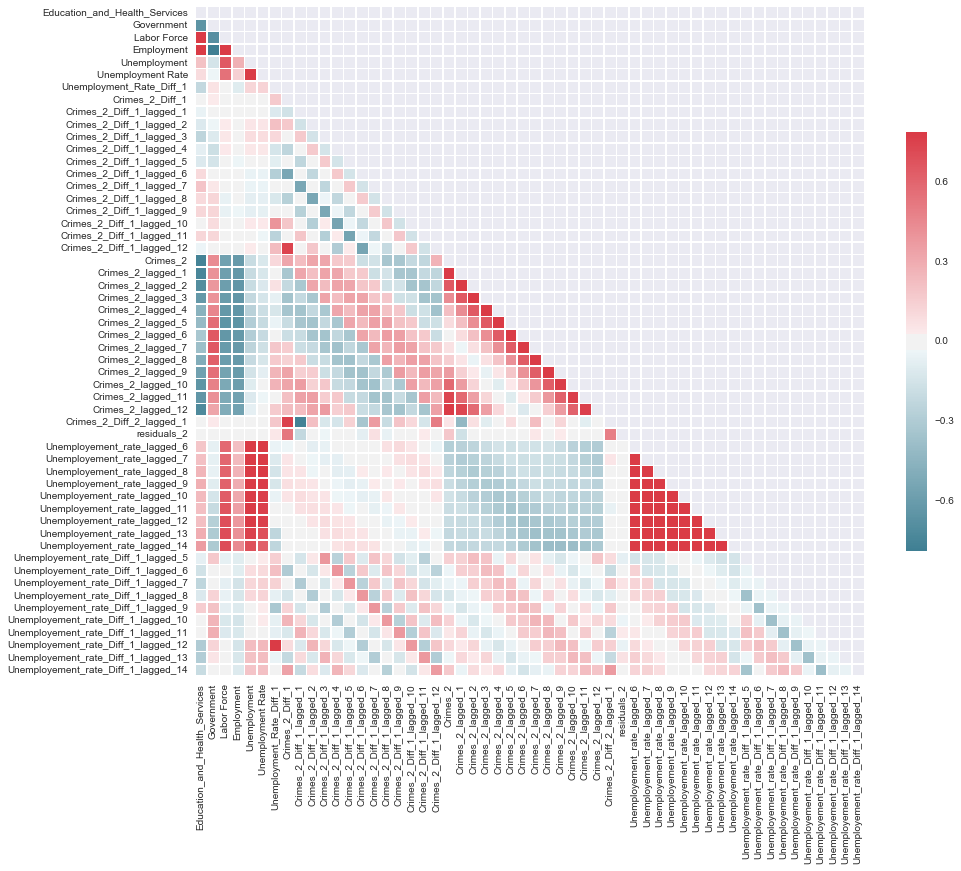

In [52]:
corr = df_2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Recherche de variables explicatives pour les résiduts

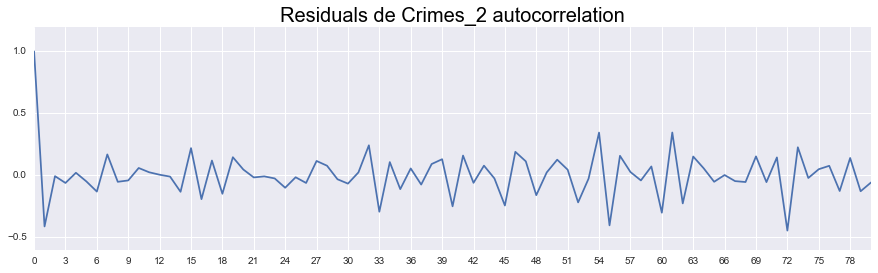

In [54]:
plt.figure(figsize=(15,4))
plt.plot([df.residuals_2.autocorr(lag=i) for i in range(0,81)])
plt.xticks(np.arange(0,80,3))
plt.title('Residuals de Crimes_2 autocorrelation', color = 'k', fontsize = 20)